# Color Thresholding in HSV

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread("./images/coral_reef.jpg")

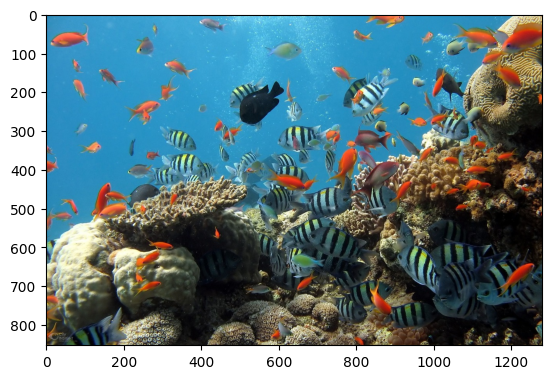

In [3]:
# OpenCV load in BGR, to show it in RGB we rerquire conversion

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

plt.imshow(rgb_image)

In [4]:
# # To target a specific color with the help of HSV
# upper = np.array([4, 198, 120])
# lower = np.array([2, 170, 80])
lower = np.array([0, 0, 190])
upper = np.array([30, 80, 255])

In [7]:
# # To target a specific color with the help of HSV
# upper = np.array([4, 198, 120])
# lower = np.array([2, 170, 80])
import math
def hsv2cv(h, s, v):
    cv_h = math.floor(h * 179/360)
    cv_s = math.floor(s * 255/100)
    cv_v = math.floor(v * 255/100)
    
    return [cv_h, cv_s, cv_v]
 
lower = np.array(hsv2cv(192, 69, 64))
upper = np.array(hsv2cv(220, 80, 90))

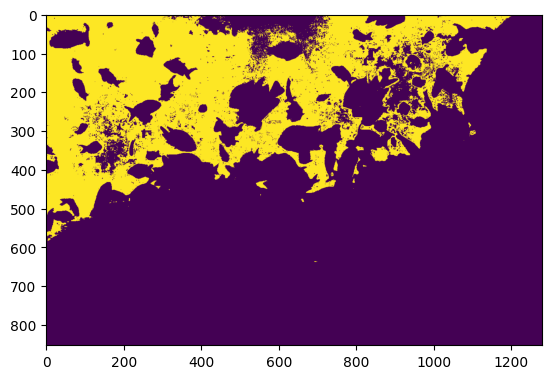

In [8]:
mask = cv.inRange(hsv_image, lower, upper)

plt.imshow(mask)

In [9]:
# Display in BW with openCV
cv.imshow("Image Window", mask) # Title of diplay window to show, and argument of image
cv.waitKey(0)                    # pauses program until a key is pressed (wait open until input)
cv.destroyAllWindows()           # destroy all when key is pressed 

In [ ]:
# replace with black HSV
# define a single black HSV pixel in the three channel space (H, S, v)
# S = 255, with V = 0 everything is black due to the Value to 0
black_hsv = np.uint8([[[120, 255, 0]]]) 
# 8 bit unsigned int is required (uint8), the precision is required

# convert is a BGR (converted to blue)
# we take [0][0] element as the first pixel in the channels
black_bgr = cv.cvtColor(black_hsv, cv.COLOR_HSV2BGR)[0][0]

In [11]:
# replace with green HSV
# define a single black HSV pixel in the three channel space (H, S, v)
# S = 255, with V = 0 everything is black due to the Value to 0
green_hsv = np.uint8([[hsv2cv(110, 90, 90)]]) 
# 8 bit unsigned int is required (uint8), the precision is required

# convert is a BGR (converted to blue)
# we take [0][0] element as the first pixel in the channels
green_bgr = cv.cvtColor(green_hsv, cv.COLOR_HSV2BGR)[0][0]

In [12]:
# Create a copy of the image, where operations will be done
image_result = image.copy()

# change white to black (masking)
# whenever mask > 0, thresholding is applied
# image_result[mask > 0] = black_bgr
image_result[mask > 0] = green_bgr

In [13]:
# Convert and plot how the result look like
image_result_rgb = cv.cvtColor(image_result, cv.COLOR_BGR2RGB)

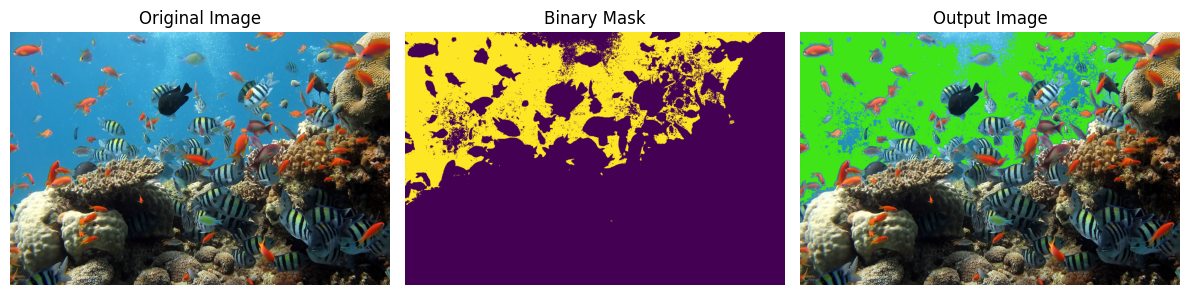

In [14]:
# Create a plot
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(rgb_image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("Binary Mask")
axs[1].axis('off')

axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()